In [3]:
import pandas as pd 
from pathlib import Path
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib
import sqlite3

In [4]:
# ETL

In [5]:
# Read in the CSV file as a Pandas Dataframe
df = pd.read_csv(Path("resources/baseballData.csv"))
#ridding csv of partial seasons
dfFullYear = df[~df['year'].isin([2020, 2024])]
#dropping unesscessary columns
#'babip','bacon',
dfFullYear.drop(columns=["player_id",'player_age', "last_name, first_name", 'year', 'ab', 'pa', 'hit', 'single', 'double', 'triple', 'out_zone_swing_miss', 'babip','bacon',
       'out_zone_swing', 'out_zone_percent', 'out_zone', 'in_zone_swing_miss', 'single', 'double', 'triple', 'home_run', 'strikeout', 'walk', 'bb_percent', 'on_base_percent', 'on_base_plus_slg', 'isolated_power','woba','wobacon',
       'in_zone_swing','batted_ball', 'groundballs', 'flyballs', 'linedrives', 'popups',
       'home_run', 'strikeout', 'walk'], inplace=True)
dfFullYear.columns
dfFullYear.head(10)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_7520\1161540600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFullYear.drop(columns=["player_id",'player_age', "last_name, first_name", 'year', 'ab', 'pa', 'hit', 'single', 'double', 'triple', 'out_zone_swing_miss', 'babip','bacon',


,k_percent,batting_avg,slg_percent,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel,barrel_batted_rate,solidcontact_percent,flareburner_percent,...,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent
0,18.5,0.240,0.409,88.5,10.8,28.5,21,5.0,5.2,21.6,...,23.1,53.4,34.7,40.6,24.5,64.0,49.4,22.6,20.9,7.1
1,15.5,0.273,0.553,93.0,15.7,34.8,58,13.1,8.4,24.9,...,23.2,44.7,41.9,36.4,21.7,52.1,37.6,25.6,28.7,8.1
2,23.4,0.250,0.486,91.3,12.2,31.4,42,10.9,8.1,20.3,...,32.0,43.9,38.4,43.9,16.9,60.3,43.6,24.9,24.9,6.5
3,13.2,0.246,0.423,87.4,15.8,33.5,23,5.6,6.6,23.3,...,17.9,52.9,36.9,38.3,24.8,65.5,37.6,24.5,29.1,8.7
4,10.5,0.287,0.453,89.5,12.6,35.7,28,5.5,7.8,26.3,...,16.8,48.1,35.3,41.4,23.3,61.9,42.4,18.4,31.6,7.6
5,16.0,0.276,0.471,90.6,15.6,34.1,23,5.8,7.5,27.3,...,18.1,45.4,40.6,38.3,19.3,57.3,36.8,26.6,28.1,8.5
6,15.3,0.224,0.358,85.7,16.2,32.1,11,2.5,4.2,23.8,...,18.1,45.0,46.0,32.6,21.2,56.5,41.3,24.7,24.2,9.7
7,10.9,0.244,0.480,90.7,14.2,29.5,41,7.7,5.3,22.7,...,16.3,45.4,43.3,37.0,19.5,56.0,42.8,25.5,23.8,7.9
8,26.7,0.247,0.453,86.3,12.1,33.9,31,8.5,5.5,21.9,...,31.2,60.2,36.6,35.8,27.6,70.4,43.7,22.7,28.7,4.9
9,16.8,0.265,0.380,89.5,4.4,33.3,18,3.7,8.0,28.6,...,16.8,40.7,28.2,39.7,32.1,57.2,57.6,13.4,27.2,1.9


In [6]:
dfFullYear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 0 to 1245
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   k_percent               1104 non-null   float64
 1   batting_avg             1104 non-null   float64
 2   slg_percent             1104 non-null   float64
 3   exit_velocity_avg       1104 non-null   float64
 4   launch_angle_avg        1104 non-null   float64
 5   sweet_spot_percent      1104 non-null   float64
 6   barrel                  1104 non-null   int64  
 7   barrel_batted_rate      1104 non-null   float64
 8   solidcontact_percent    1104 non-null   float64
 9   flareburner_percent     1104 non-null   float64
 10  poorlyunder_percent     1104 non-null   float64
 11  poorlytopped_percent    1104 non-null   float64
 12  poorlyweak_percent      1104 non-null   float64
 13  hard_hit_percent        1104 non-null   float64
 14  avg_best_speed          1104 non-null   float

In [7]:
dfFullYear.to_csv('Resources/Baseball_stats_cleaned.csv', index = False)

In [8]:
# SQL DB

In [9]:
# Step1. Load data file
df_cleaned = pd.read_csv('Resources/Baseball_stats_cleaned.csv')

In [10]:
df_cleaned.columns

Index(['k_percent', 'batting_avg', 'slg_percent', 'exit_velocity_avg',
       'launch_angle_avg', 'sweet_spot_percent', 'barrel',
       'barrel_batted_rate', 'solidcontact_percent', 'flareburner_percent',
       'poorlyunder_percent', 'poorlytopped_percent', 'poorlyweak_percent',
       'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed',
       'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent',
       'oz_swing_miss_percent', 'oz_contact_percent', 'meatball_swing_percent',
       'iz_contact_percent', 'whiff_percent', 'swing_percent', 'pull_percent',
       'straightaway_percent', 'opposite_percent', 'f_strike_percent',
       'groundballs_percent', 'flyballs_percent', 'linedrives_percent',
       'popups_percent'],
      dtype='object')

In [11]:
# Step2. Create/connect to SQLite DB.
connection = sqlite3.connect('stats.db')

In [12]:
# Step3. Load dataset to SQLite DB
df_cleaned.to_sql('baseball_stats', connection, if_exists = 'replace')

1104

In [13]:
#Scale the Data
scaler = StandardScaler()
scaler.fit(dfFullYear)

StandardScaler()

In [14]:
df_cleaned


,k_percent,batting_avg,slg_percent,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel,barrel_batted_rate,solidcontact_percent,flareburner_percent,...,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent
0,18.5,0.240,0.409,88.5,10.8,28.5,21,5.0,5.2,21.6,...,23.1,53.4,34.7,40.6,24.5,64.0,49.4,22.6,20.9,7.1
1,15.5,0.273,0.553,93.0,15.7,34.8,58,13.1,8.4,24.9,...,23.2,44.7,41.9,36.4,21.7,52.1,37.6,25.6,28.7,8.1
2,23.4,0.250,0.486,91.3,12.2,31.4,42,10.9,8.1,20.3,...,32.0,43.9,38.4,43.9,16.9,60.3,43.6,24.9,24.9,6.5
3,13.2,0.246,0.423,87.4,15.8,33.5,23,5.6,6.6,23.3,...,17.9,52.9,36.9,38.3,24.8,65.5,37.6,24.5,29.1,8.7
4,10.5,0.287,0.453,89.5,12.6,35.7,28,5.5,7.8,26.3,...,16.8,48.1,35.3,41.4,23.3,61.9,42.4,18.4,31.6,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,19.4,0.285,0.506,90.0,11.0,32.7,34,7.6,7.8,22.0,...,21.5,45.8,38.4,36.9,24.7,57.9,45.3,24.0,23.3,7.3
1100,25.6,0.255,0.489,92.0,11.4,32.9,46,11.4,7.9,23.3,...,26.4,46.8,36.6,38.1,25.2,62.6,45.8,26.5,23.3,4.5
1101,27.8,0.209,0.383,88.7,14.2,35.5,34,9.0,7.7,23.1,...,28.1,47.9,46.7,30.5,22.8,62.6,41.1,27.6,24.9,6.4
1102,21.0,0.258,0.429,90.6,11.2,30.3,37,8.4,7.3,24.1,...,24.1,47.5,37.4,35.1,27.6,62.8,44.4,23.7,24.4,7.5


In [15]:
#Assign Variables to be Trained
y = df_cleaned["batting_avg"]
X = df_cleaned.drop(columns=['batting_avg', 'k_percent'], inplace=False)

In [16]:
X

,slg_percent,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,...,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent
0,0.409,88.5,10.8,28.5,21,5.0,5.2,21.6,24.5,39.0,...,23.1,53.4,34.7,40.6,24.5,64.0,49.4,22.6,20.9,7.1
1,0.553,93.0,15.7,34.8,58,13.1,8.4,24.9,24.0,27.1,...,23.2,44.7,41.9,36.4,21.7,52.1,37.6,25.6,28.7,8.1
2,0.486,91.3,12.2,31.4,42,10.9,8.1,20.3,23.9,35.1,...,32.0,43.9,38.4,43.9,16.9,60.3,43.6,24.9,24.9,6.5
3,0.423,87.4,15.8,33.5,23,5.6,6.6,23.3,30.3,29.4,...,17.9,52.9,36.9,38.3,24.8,65.5,37.6,24.5,29.1,8.7
4,0.453,89.5,12.6,35.7,28,5.5,7.8,26.3,23.5,33.7,...,16.8,48.1,35.3,41.4,23.3,61.9,42.4,18.4,31.6,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,0.506,90.0,11.0,32.7,34,7.6,7.8,22.0,22.7,34.2,...,21.5,45.8,38.4,36.9,24.7,57.9,45.3,24.0,23.3,7.3
1100,0.489,92.0,11.4,32.9,46,11.4,7.9,23.3,20.8,32.9,...,26.4,46.8,36.6,38.1,25.2,62.6,45.8,26.5,23.3,4.5
1101,0.383,88.7,14.2,35.5,34,9.0,7.7,23.1,23.9,31.3,...,28.1,47.9,46.7,30.5,22.8,62.6,41.1,27.6,24.9,6.4
1102,0.429,90.6,11.2,30.3,37,8.4,7.3,24.1,23.9,33.7,...,24.1,47.5,37.4,35.1,27.6,62.8,44.4,23.7,24.4,7.5


In [17]:
#Split the data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 50)


In [18]:
#Create a Rabndom Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=50)

In [19]:
#Train the Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=50)

In [20]:
#Make Predictions
predictions = rf_model.predict(X_test)
print(predictions)


[0.28991 0.29118 0.23097 0.2871  0.29752 0.25889 0.26559 0.27031 0.22962
 0.25732 0.30468 0.27229 0.27854 0.2701  0.25278 0.24411 0.27788 0.26794
 0.28515 0.27851 0.26221 0.25874 0.27285 0.23867 0.25084 0.30243 0.25146
 0.25527 0.25344 0.26079 0.27219 0.27482 0.24617 0.27941 0.26721 0.26527
 0.26    0.23286 0.27668 0.25823 0.26941 0.25148 0.26325 0.31756 0.27125
 0.26179 0.26526 0.29516 0.27151 0.25073 0.25183 0.27701 0.24021 0.24871
 0.28337 0.27594 0.28932 0.24117 0.24948 0.26679 0.29145 0.28835 0.28232
 0.27332 0.26278 0.28669 0.24542 0.24254 0.28918 0.24808 0.2813  0.23022
 0.24419 0.26377 0.25971 0.23083 0.26316 0.24507 0.23212 0.28376 0.26552
 0.24929 0.26712 0.26652 0.27665 0.27164 0.27816 0.25525 0.27067 0.28005
 0.27804 0.25751 0.26519 0.2336  0.24183 0.3009  0.25761 0.28305 0.31683
 0.26203 0.23605 0.26339 0.29936 0.30283 0.25687 0.25763 0.2423  0.26498
 0.2646  0.29802 0.28669 0.2542  0.31209 0.27254 0.25734 0.30768 0.25392
 0.22673 0.2828  0.27169 0.28275 0.27613 0.28981 0.

In [21]:
mean = mean_absolute_error(y_test, predictions)
print("Mean", mean)

Mean 0.011436108597285076


In [22]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = sorted(zip(importances, feature_names), reverse=True)
feature_importances

[(0.33956143561765123, 'slg_percent'),
 (0.2100566730864189, 'flareburner_percent'),
 (0.06303760082910298, 'flyballs_percent'),
 (0.03259345869153395, 'pull_percent'),
 (0.030878461697050413, 'launch_angle_avg'),
 (0.025737978067616622, 'whiff_percent'),
 (0.023898766147110336, 'oz_contact_percent'),
 (0.022663761371190194, 'barrel_batted_rate'),
 (0.021507352317718376, 'oz_swing_miss_percent'),
 (0.019053378649915822, 'z_swing_miss_percent'),
 (0.018297910494736464, 'poorlyunder_percent'),
 (0.017830933656153087, 'popups_percent'),
 (0.016935787548645997, 'opposite_percent'),
 (0.01693383731098334, 'linedrives_percent'),
 (0.01482882932900009, 'iz_contact_percent'),
 (0.011975350040000714, 'poorlytopped_percent'),
 (0.011905883577296704, 'groundballs_percent'),
 (0.010545440049933496, 'straightaway_percent'),
 (0.009461369237451413, 'poorlyweak_percent'),
 (0.009265023952676662, 'f_strike_percent'),
 (0.008717847095030574, 'sweet_spot_percent'),
 (0.008243953837810153, 'solidcontact_

In [23]:
df_importance = feature_importances

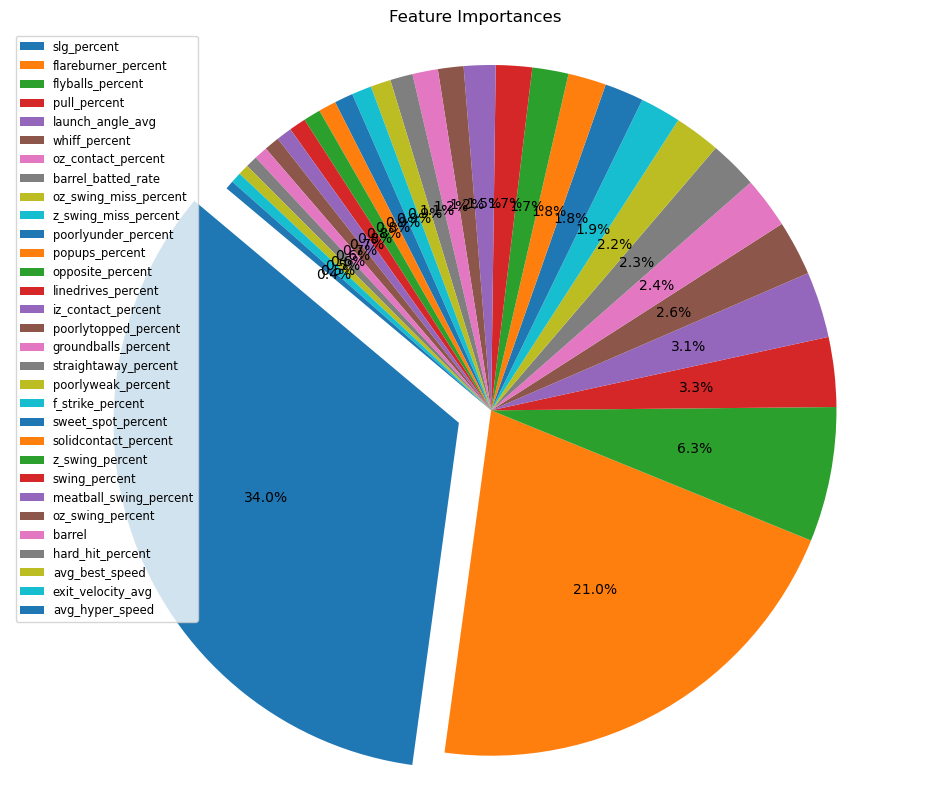

In [30]:
import matplotlib.pyplot as plt

# Sorting the feature importances
sorted_feature_importances = sorted(feature_importances, reverse=True)

# Extracting feature importances and feature names
importances = [f[0] for f in sorted_feature_importances]
feature_names = [f[1] for f in sorted_feature_importances]

# Plotting the pie chart
plt.figure(figsize=(12, 10))
# Explode the first slice (most important feature)
explode = (0.1,) + (0,) * (len(importances) - 1)
plt.pie(importances, labels=None, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a legend
plt.legend(feature_names, loc="best", fontsize="small")
plt.title('Feature Importances')
plt.show()


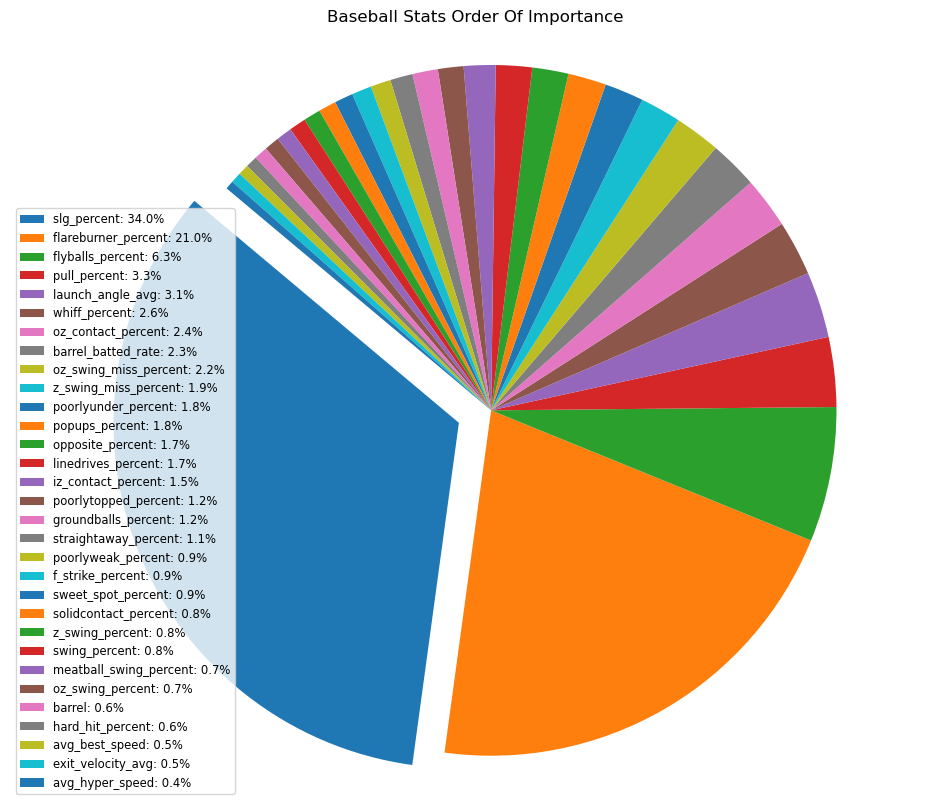

In [41]:
import matplotlib.pyplot as plt

# Sorting the feature importances
sorted_feature_importances = sorted(feature_importances, reverse=True)

# Extracting feature importances and feature names
importances = [f[0] for f in sorted_feature_importances]
feature_names = [f[1] for f in sorted_feature_importances]

# Plotting the pie chart
plt.figure(figsize=(12, 10))
# Explode the first slice (most important feature)
explode = (0.1,) + (0,) * (len(importances) - 1)
# Plotting the pie chart without percentage labels
patches, _ = plt.pie(importances, labels=None, startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a legend with percentages next to feature names
legend_labels = [f'{name}: {imp*100:.1f}%' for name, imp in zip(feature_names, importances)]
plt.legend(handles=patches, labels=legend_labels, loc="best", fontsize="small")

plt.title('Baseball Stats Order Of Importance')
plt.show()






C:\Users\Thomas\AppData\Local\Temp\ipykernel_7520\2438299293.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('RdYlBu_r')


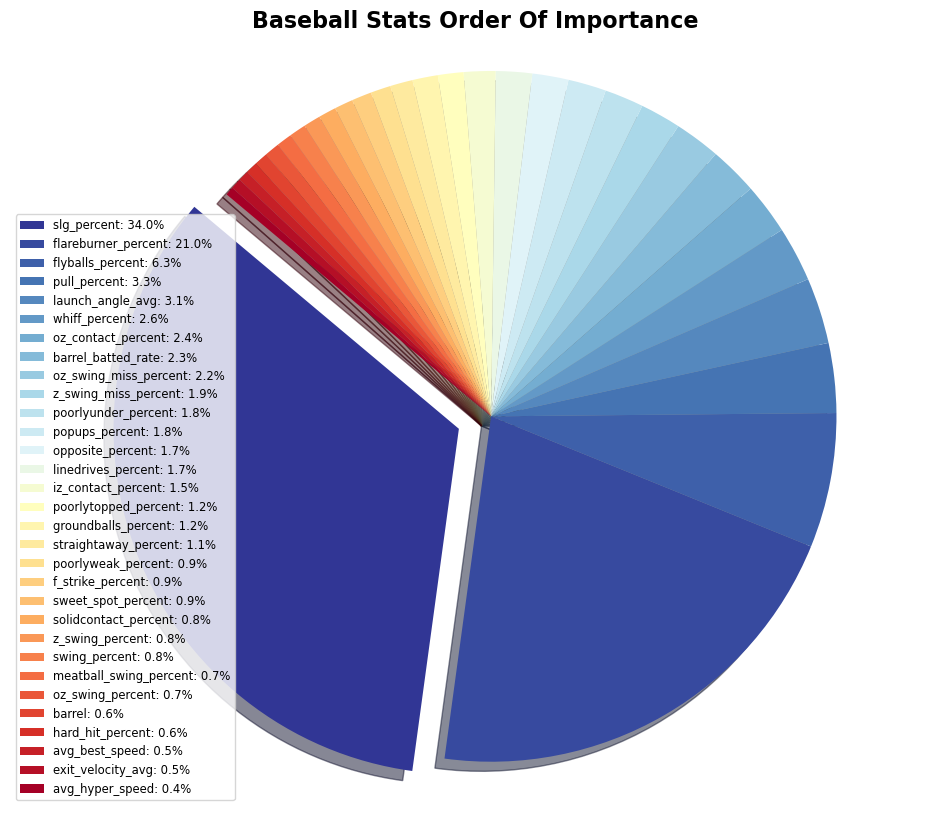

In [45]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Sorting the feature importances
sorted_feature_importances = sorted(feature_importances, reverse=True)

# Extracting feature importances and feature names
importances = [f[0] for f in sorted_feature_importances]
feature_names = [f[1] for f in sorted_feature_importances]

# Define a colormap that transitions from green to red
color_map = cm.get_cmap('RdYlBu_r')

# Plotting the pie chart
plt.figure(figsize=(12, 10))
# Explode the first slice (most important feature)
explode = (0.1,) + (0,) * (len(importances) - 1)
# Plotting the pie chart without percentage labels
patches, _ = plt.pie(importances, labels=None, startangle=140, explode=explode, colors=color_map(np.linspace(0, 1, len(importances))), shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a legend with percentages next to feature names
legend_labels = [f'{name}: {imp*100:.1f}%' for name, imp in zip(feature_names, importances)]
plt.legend(handles=patches, labels=legend_labels, loc="best", fontsize="small")

plt.title('Baseball Stats Order Of Importance', fontsize=16, fontweight='bold')
plt.show()





C:\Users\Thomas\AppData\Local\Temp\ipykernel_7520\2611196987.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('RdYlGn_r')


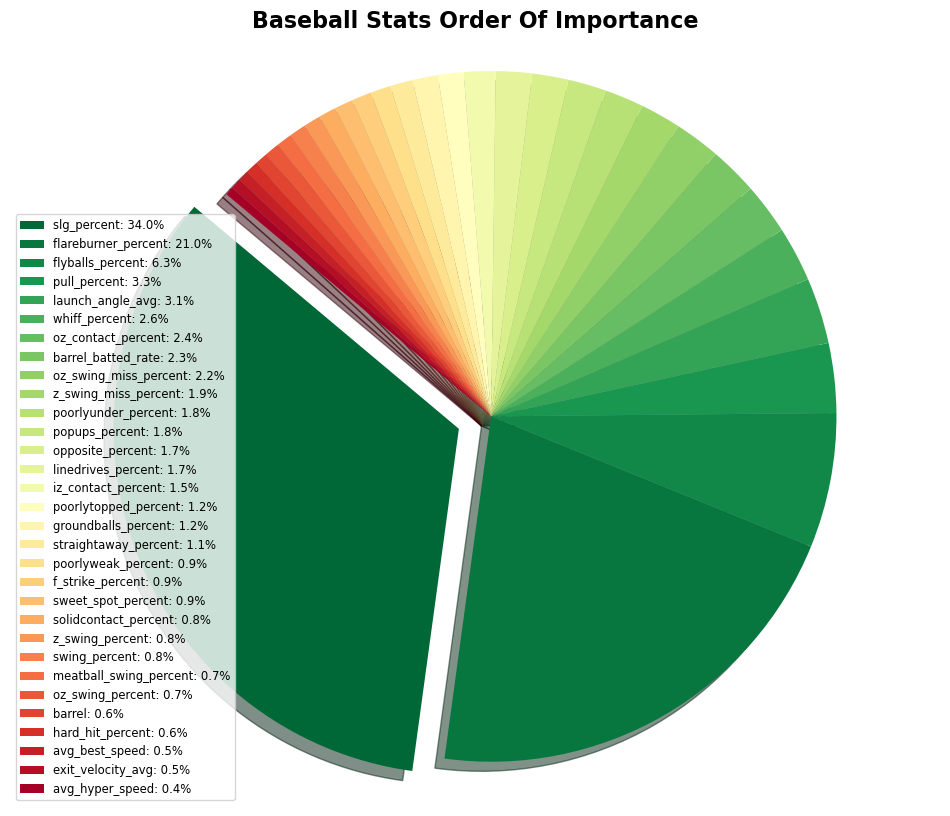

In [47]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Sorting the feature importances
sorted_feature_importances = sorted(feature_importances, reverse=True)

# Extracting feature importances and feature names
importances = [f[0] for f in sorted_feature_importances]
feature_names = [f[1] for f in sorted_feature_importances]

# Define a colormap that transitions from green to red
color_map = cm.get_cmap('RdYlGn_r')

# Plotting the pie chart
plt.figure(figsize=(12, 10))
# Explode the first slice (most important feature)
explode = (0.1,) + (0,) * (len(importances) - 1)
# Plotting the pie chart without percentage labels
patches, _ = plt.pie(importances, labels=None, startangle=140, explode=explode, colors=color_map(np.linspace(0, 1, len(importances))), shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a legend with percentages next to feature names
legend_labels = [f'{name}: {imp*100:.1f}%' for name, imp in zip(feature_names, importances)]
plt.legend(handles=patches, labels=legend_labels, loc="best", fontsize="small")

plt.title('Baseball Stats Order Of Importance', fontsize=16, fontweight='bold')
plt.show()



In [25]:
importances

[0.33956143561765123,
 0.2100566730864189,
 0.06303760082910298,
 0.03259345869153395,
 0.030878461697050413,
 0.025737978067616622,
 0.023898766147110336,
 0.022663761371190194,
 0.021507352317718376,
 0.019053378649915822,
 0.018297910494736464,
 0.017830933656153087,
 0.016935787548645997,
 0.01693383731098334,
 0.01482882932900009,
 0.011975350040000714,
 0.011905883577296704,
 0.010545440049933496,
 0.009461369237451413,
 0.009265023952676662,
 0.008717847095030574,
 0.008243953837810153,
 0.008024263745781536,
 0.007892363812501498,
 0.007252230666159127,
 0.0071062827496779545,
 0.006242325777639265,
 0.005514754330202802,
 0.005015431937426336,
 0.004994165470354362,
 0.004027148905229652]

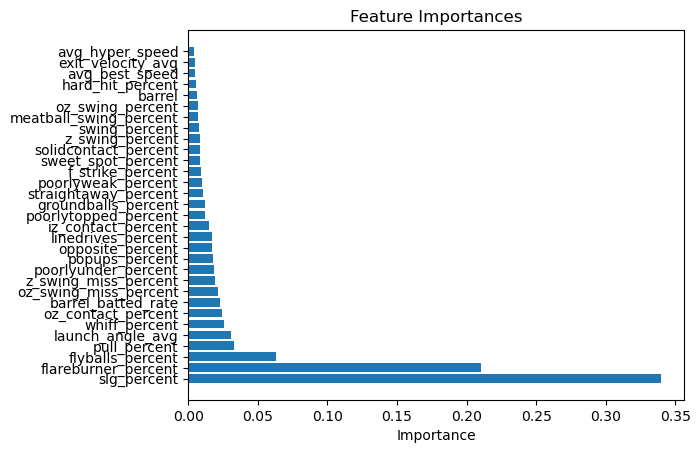

In [26]:
importances, names = zip(*feature_importances)

# Create a bar chart
plt.barh(names, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [27]:
X_test.columns

Index(['slg_percent', 'exit_velocity_avg', 'launch_angle_avg',
       'sweet_spot_percent', 'barrel', 'barrel_batted_rate',
       'solidcontact_percent', 'flareburner_percent', 'poorlyunder_percent',
       'poorlytopped_percent', 'poorlyweak_percent', 'hard_hit_percent',
       'avg_best_speed', 'avg_hyper_speed', 'z_swing_percent',
       'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent',
       'oz_contact_percent', 'meatball_swing_percent', 'iz_contact_percent',
       'whiff_percent', 'swing_percent', 'pull_percent',
       'straightaway_percent', 'opposite_percent', 'f_strike_percent',
       'groundballs_percent', 'flyballs_percent', 'linedrives_percent',
       'popups_percent'],
      dtype='object')

In [28]:
# Close SQL connection
connection.close()

In [29]:
from joblib import dump, load
dump(rf_model, 'baseball_stats.joblib')

['baseball_stats.joblib']

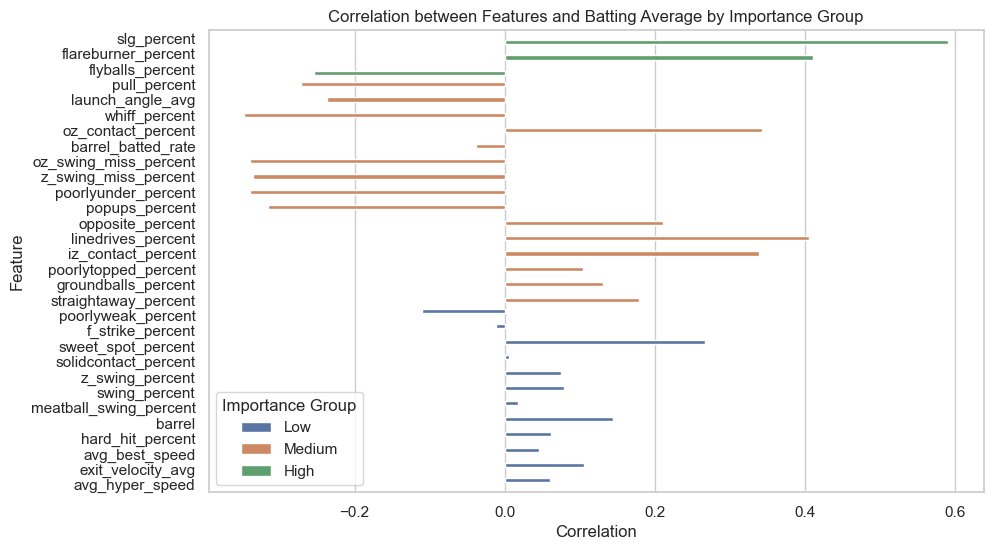

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual DataFrame)
feature_importances = [
    
    (0.33956143561765123, 'slg_percent'),
    (0.2100566730864189, 'flareburner_percent'),
    (0.06303760082910298, 'flyballs_percent'),
    (0.03259345869153395, 'pull_percent'),
    (0.030878461697050413, 'launch_angle_avg'),
    (0.025737978067616622, 'whiff_percent'),
    (0.023898766147110336, 'oz_contact_percent'),
    (0.022663761371190194, 'barrel_batted_rate'),
    (0.021507352317718376, 'oz_swing_miss_percent'),
    (0.019053378649915822, 'z_swing_miss_percent'),
    (0.018297910494736464, 'poorlyunder_percent'),
    (0.017830933656153087, 'popups_percent'),
    (0.016935787548645997, 'opposite_percent'),
    (0.01693383731098334, 'linedrives_percent'),
    (0.01482882932900009, 'iz_contact_percent'),
    (0.011975350040000714, 'poorlytopped_percent'),
    (0.011905883577296704, 'groundballs_percent'),
    (0.010545440049933496, 'straightaway_percent'),
    (0.009461369237451413, 'poorlyweak_percent'),
    (0.009265023952676662, 'f_strike_percent'),
    (0.008717847095030574, 'sweet_spot_percent'),
    (0.008243953837810153, 'solidcontact_percent'),
    (0.008024263745781536, 'z_swing_percent'),
    (0.007892363812501498, 'swing_percent'),
    (0.007252230666159127, 'meatball_swing_percent'),
    (0.006242325777639265, 'barrel'),
    (0.005514754330202802, 'hard_hit_percent'),
    (0.005015431937426336, 'avg_best_speed'),
    (0.004994165470354362, 'exit_velocity_avg'),
    (0.004027148905229652, 'avg_hyper_speed')
]

# Convert the feature importances into a DataFrame
df_importance = pd.DataFrame(feature_importances, columns=['Importance', 'Feature'])

# Define the batting average column name in your DataFrame
batting_average_column = 'batting_avg'

# Calculate correlations between features and batting average
correlations = {}
for feature in df_importance['Feature']:
    correlation = df[[feature, batting_average_column]].corr().iloc[0, 1]
    correlations[feature] = correlation

# Convert correlations into a DataFrame
df_correlations = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation'])

# Merge feature importance and correlation DataFrames
df_merged = df_importance.merge(df_correlations, on='Feature')

# Define thresholds for categorizing importance
high_importance_threshold = 0.061
low_importance_threshold = 0.01

# Group features based on importance
df_merged['Importance Group'] = pd.cut(df_merged['Importance'],
                                       bins=[-np.inf, low_importance_threshold, high_importance_threshold, np.inf],
                                       labels=['Low', 'Medium', 'High'])

# Plot correlations for each importance group
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', hue='Importance Group', data=df_merged)
plt.title('Correlation between Features and Batting Average by Importance Group')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.legend(title='Importance Group')
plt.show()


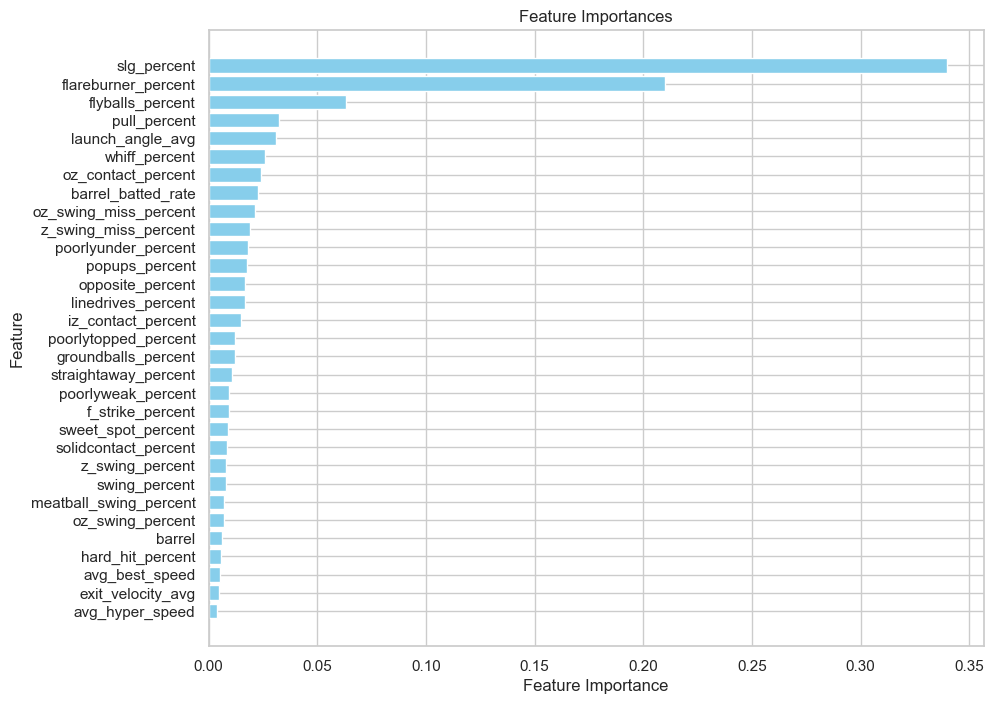

In [55]:
import matplotlib.pyplot as plt

# Extracting feature importances and feature names
importances = [f[0] for f in sorted_feature_importances]
feature_names = [f[1] for f in sorted_feature_importances]

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()


## Slugging Percentage (SLG)
Definition
Slugging percentage represents the total number of bases a player records per at-bat. Unlike on-base percentage, slugging percentage deals only with hits and does not include walks and hit-by-pitches in its equation.

Slugging percentage differs from batting average in that all hits are not valued equally. While batting average is calculated by dividing the total number of hits by the total number of at-bats, the formula for slugging percentage is: (1B + 2Bx2 + 3Bx3 + HRx4)/AB.

Although a double is not worth exactly twice as much as a single in the context of scoring runs, slugging percentage is still one of the best evaluators of power, because it accounts for more than just home runs.

Slugging percentage can also be applied as an evaluative tool for pitchers, although this is done less frequently. In such cases, it is referred to as slugging-percentage against.

In A Call
"slugging," as a verb: "to slug"

## Flyballs Percentage

## Flareburner Percentage